###  **Loading and Analysing Treasury Bills Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data/Tbills.csv')

In [ ]:
data.head()

,money_start,money_goal,period,tbills
0,8000,17000,1,4.84
1,6000,10000,1,4.84
2,7000,9000,1,4.84
3,2000,5000,1,4.84
4,9000,11000,1,4.84


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   money_start  500 non-null    int64  
 1   money_goal   500 non-null    int64  
 2   period       500 non-null    int64  
 3   tbills       500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [ ]:
data['period'] = data['period'].astype(int) ## Converting data type of period to int

### **Feature Engineering**

Including the revelant columns calculated from the existing ones

In [ ]:
import numpy as np

lst1 = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = data['money_start'][j]*((1+data['tbills'][j]/100)**period)
    lst1 = np.append(lst1,a)

In [ ]:
data['term1'] = lst1

In [ ]:
import numpy as np

lst = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = sum((1+ data['tbills'][j]/100)**(period-i) for i in range(1,period))
    lst = np.append(lst,a)



In [ ]:
sum((1+ 4.84/100)**(2-i) for i in range(1,2))

1.0484

In [ ]:
data['term2'] = lst

In [ ]:
data.head()

,money_start,money_goal,period,tbills,term1,term2
0,8000,17000,1,4.84,8793.14048,1.0484
1,6000,10000,1,4.84,6594.85536,1.0484
2,7000,9000,1,4.84,7693.99792,1.0484
3,2000,5000,1,4.84,2198.28512,1.0484
4,9000,11000,1,4.84,9892.28304,1.0484


In [ ]:
lst2 = []

for j in range(0,len(data)):
    increment = (data['money_goal'][j] - data['term1'][j])/data['term2'][j]

    lst2 = np.append(lst2, increment)


In [ ]:
data['increment'] = lst2

In [ ]:
data.head()

,money_start,money_goal,period,tbills,term1,term2,increment
0,8000,17000,1,4.84,8793.14048,1.0484,7827.985044
1,6000,10000,1,4.84,6594.85536,1.0484,3247.944143
2,7000,9000,1,4.84,7693.99792,1.0484,1245.709729
3,2000,5000,1,4.84,2198.28512,1.0484,2672.372072
4,9000,11000,1,4.84,9892.28304,1.0484,1056.578558


### **Train-Test-Split**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = data.sample(frac=1)

In [ ]:
### Features and Target column

features = data.drop('increment', axis=1)
target = data['increment']

In [ ]:
### Train Test Split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, target, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(350, 6) (75, 6) (75, 6) (350,) (75,) (75,)


In [ ]:
### Standardization

#scaler = StandardScaler()

#train_scaled = pd.DataFrame(
      #scaler.fit_transform(X_train),
      #columns=X_train.columns)

#test_scaled = pd.DataFrame(
      #scaler.transform(X_test),
      #columns=X_test.columns)

#train_val_scaled = pd.DataFrame(
      #caler.fit_transform(X_val),
      #columns=X_val.columns)

### **Model Building**

In [ ]:
### Neural Networks

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,), kernel_initializer='normal'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Dense(1, activation='linear',kernel_initializer='normal'),
])

In [ ]:
#from tensorflow.keras.losses import MeanSquaredLogarithmicError

#msle = MeanSquaredLogarithmicError()

model.compile(optimizer='adam',
              loss= 'mae',
             metrics = ['mae'])

In [ ]:
hist = model.fit(X_train.values, Y_train.values,
          batch_size=32, epochs=500,
          validation_data=(X_val.values, Y_val.values))

Epoch 1/500
11/11 [==============================] - 1s 63ms/step - loss: 1090.0836 - mae: 1090.0836 - val_loss: 915.4096 - val_mae: 915.4096
Epoch 2/500
11/11 [==============================] - 0s 11ms/step - loss: 924.7029 - mae: 924.7029 - val_loss: 847.2161 - val_mae: 847.2161
Epoch 3/500
11/11 [==============================] - 0s 19ms/step - loss: 893.1655 - mae: 893.1655 - val_loss: 831.0694 - val_mae: 831.0694
Epoch 4/500
11/11 [==============================] - 0s 18ms/step - loss: 871.5081 - mae: 871.5081 - val_loss: 804.9219 - val_mae: 804.9219
Epoch 5/500
11/11 [==============================] - 0s 17ms/step - loss: 840.8312 - mae: 840.8312 - val_loss: 798.8094 - val_mae: 798.8094
Epoch 6/500
11/11 [==============================] - 0s 14ms/step - loss: 811.2039 - mae: 811.2039 - val_loss: 781.6902 - val_mae: 781.6902
Epoch 7/500
11/11 [==============================] - 0s 19ms/step - loss: 787.6437 - mae: 787.6437 - val_loss: 771.8713 - val_mae: 771.8713
Epoch 8/500
11/11 

**Plotting the Model Loss**

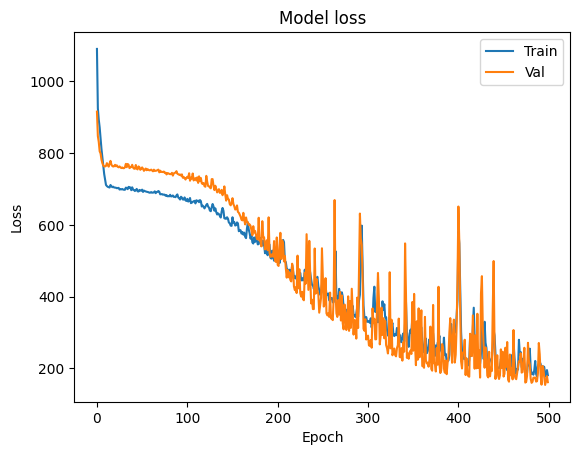

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Decision tree and Random Forest Regressor**


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [ ]:
tree_model.fit(X_train.values, Y_train.values)
rf_model.fit(X_train.values, Y_train.values)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score ##Calculating the mean absolute error Decision tree model

score_tree = mean_absolute_error(Y_test, tree_model.predict(X_test))
r2_score_tree = r2_score(Y_test, tree_model.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_rf = mean_absolute_error(Y_test, rf_model.predict(X_test)) ##Calculating the mean absolute error for Random Forest Model
r2_score_rf = r2_score(Y_test, rf_model.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_nn = mean_absolute_error(Y_test, model.predict(X_test)) ##Calculating the mean absolute error for Neural Network Model
r2_score_nn = r2_score(Y_test, model.predict(X_test))

3/3 [==============================] - 0s 3ms/step


Printing the mean absolute error scores for the above trained models

In [ ]:
print(score_tree)
print(score_rf)
print(score_nn)

245.35927087451
171.55395614701396
210.24795949159483


Printing the r2-scores for the above trained models

In [ ]:
print(r2_score_tree)
print(r2_score_rf)
print(r2_score_nn)

0.8765728118196211
0.9573774725689598
0.9520266996773349


We can say that Random Forest performed well in this scenario

**Save the model file**

In [ ]:
import pickle

pickle.dump(model, open('rf_model_tbills.pkl', 'wb'))